In [43]:
import pandas as pd
import srtm
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


In [44]:
df = pd.read_csv('merged_data_corrigido.csv', sep=';')
df

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RECIFE,261160603A,PE,Estação Experimental UFRPE,-8.018378,-34.947058,2014-01-01 00:10:32,0.0
1,RECIFE,261160603A,PE,Estação Experimental UFRPE,-8.018378,-34.947058,2014-01-01 01:10:24,0.0
2,RECIFE,261160603A,PE,Estação Experimental UFRPE,-8.018378,-34.947058,2014-01-01 02:10:25,0.0
3,RECIFE,261160603A,PE,Estação Experimental UFRPE,-8.018378,-34.947058,2014-01-01 03:10:25,0.0
4,RECIFE,261160603A,PE,Estação Experimental UFRPE,-8.018378,-34.947058,2014-01-01 04:10:25,0.0
...,...,...,...,...,...,...,...,...
2020656,RECIFE,261160623A,PE,RECIFE - APAC,-8.044910,-34.875180,2023-12-31 19:00:00,0.0
2020657,RECIFE,261160623A,PE,RECIFE - APAC,-8.044910,-34.875180,2023-12-31 20:00:00,0.0
2020658,RECIFE,261160623A,PE,RECIFE - APAC,-8.044910,-34.875180,2023-12-31 21:00:00,0.0
2020659,RECIFE,261160623A,PE,RECIFE - APAC,-8.044910,-34.875180,2023-12-31 22:00:00,0.0


In [45]:
df.isna().sum()

municipio      0
codEstacao     0
uf             0
nomeEstacao    0
latitude       0
longitude      0
datahora       0
valorMedida    0
dtype: int64

In [46]:
import pandas as pd

# Suponha que o dataframe `df` esteja definido

# Filtrar e exibir todas as linhas que contêm qualquer NaN
linhas_com_nan = df[df.isna().any(axis=1)]
print("Linhas com valores NaN:")
print(linhas_com_nan)


Linhas com valores NaN:
Empty DataFrame
Columns: [municipio, codEstacao, uf, nomeEstacao, latitude, longitude, datahora, valorMedida]
Index: []


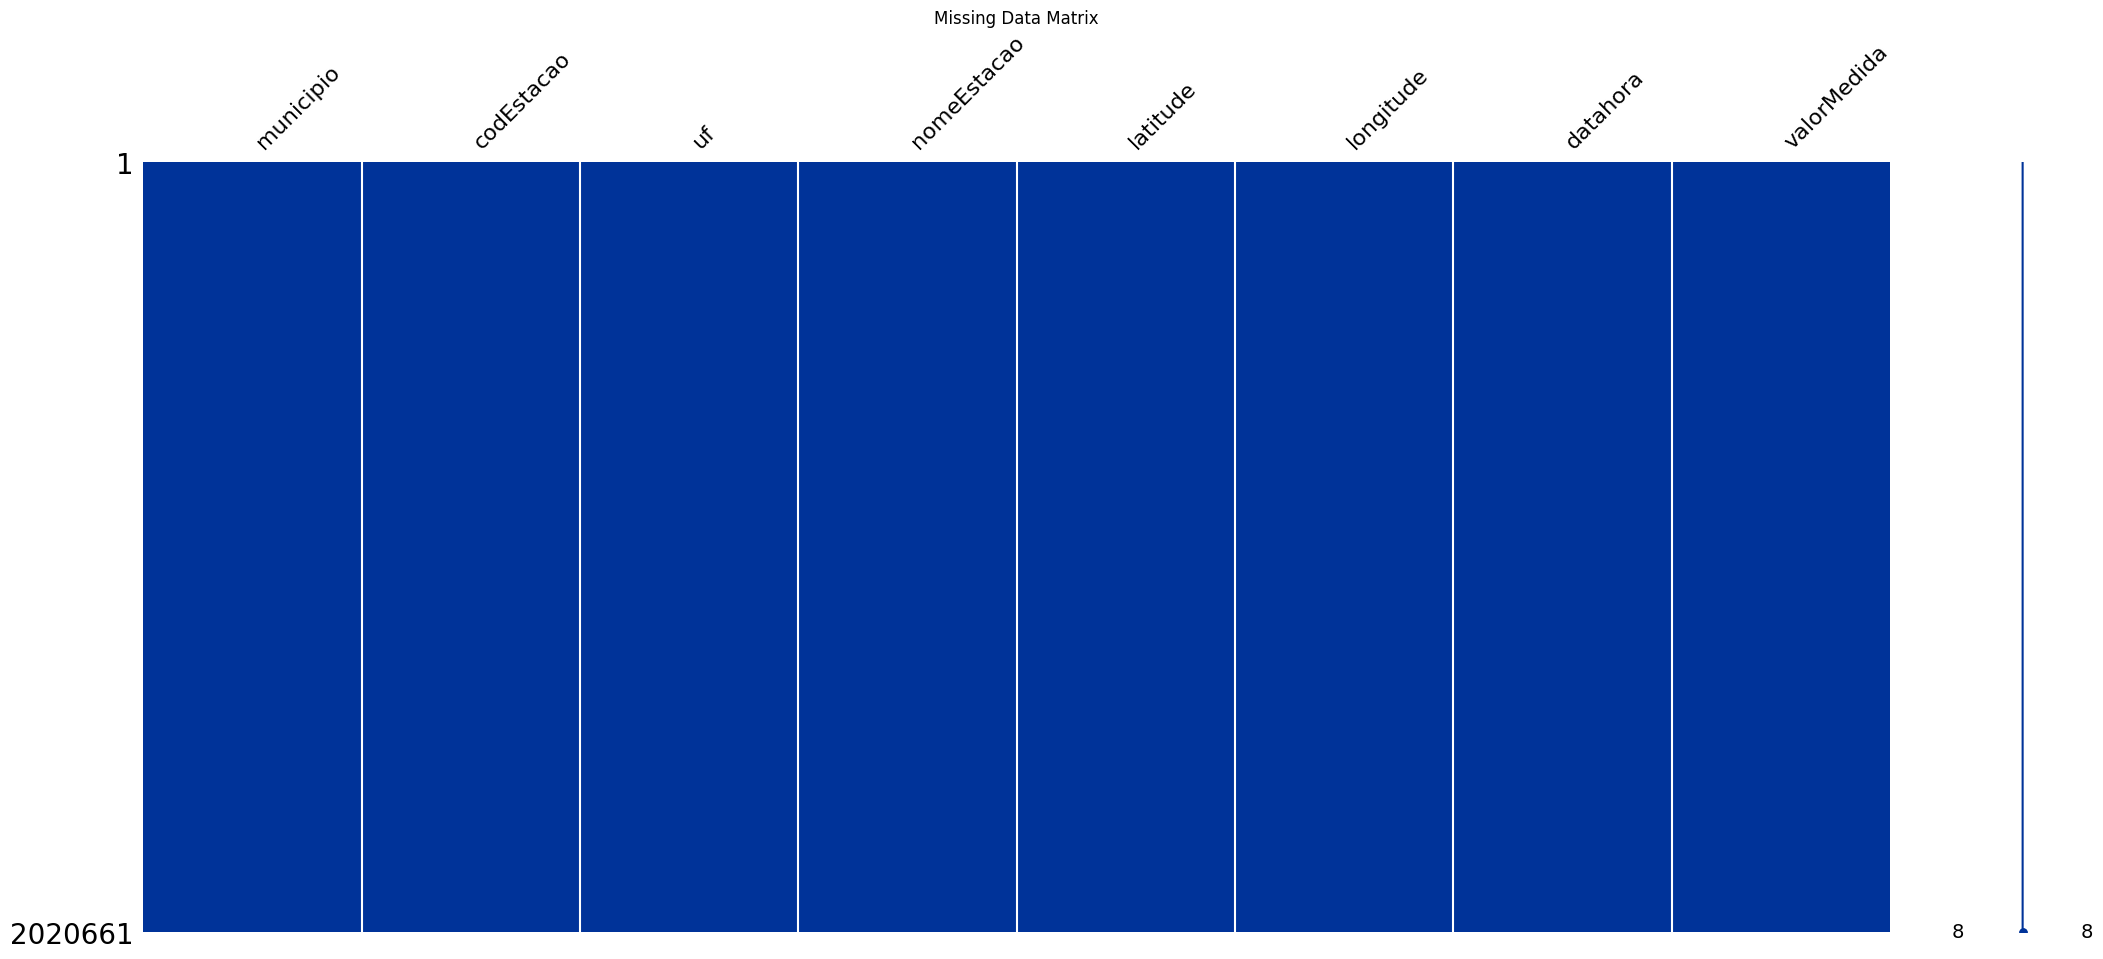

In [47]:
msno.matrix(df, color=(0.0, 0.2, 0.6)) 

plt.title('Missing Data Matrix')
# save_directory = '../reports/figures/'
# save_path = save_directory +'missing_data_matrix_query.png'
# plt.savefig(save_path)  
plt.show()

In [48]:
estacoes = df[['nomeEstacao', 'latitude', 'longitude']].drop_duplicates()


In [49]:
estacoes['longitude'].isna().sum()

0

In [50]:
stations = {}
for index, row in estacoes.iterrows():
    nome_estacao = row['nomeEstacao']
    latitude = row['latitude']
    longitude = row['longitude']
    stations[nome_estacao] = (latitude, longitude)

print(stations)

{'Estação Experimental UFRPE': (-8.018378, -34.947058), 'UPA de Nova Descoberta': (-8.001917, -34.919278), 'Dois Unidos': (-7.996278, -34.909167), 'UPA da Imbiribeira': (-8.120975, -34.913983), 'USF Alto Bela Vista-Ibura': (-8.123583, -34.941528), 'Alto do Céu': (-8.012, -34.892), 'Corrego Jenipapo': (-8.007, -34.936), 'Alto Mandu': (-8.024, -34.927), 'San Martin': (-8.073, -34.925), 'Guabiraba': (-7.994, -34.936), 'Morro da Conceição': (-8.019, -34.915), 'Campina do Barreto': (-8.013, -34.881), 'Ibura': (-8.122, -34.955), 'Várzea': (-8.039, -34.959), 'Pina': (-8.099, -34.887), 'Torreão': (-8.037, -34.884), 'Varzea': (-8.036, -34.98), 'Porto': (-8.054, -34.873), 'Areias': (-8.102, -34.929), 'Boa Vista': (-8.069, -34.891), 'RECIFE - APAC': (-8.04491, -34.87518), 'Dois Irmãos': (-8.018378, -34.947058), 'Alto Bela Vista': (-8.123583, -34.941528), 'Nova Descoberta': (-8.000933, -34.933022), 'Imbiribeira': (-8.120975, -34.913983), 'Brega e Chique': (-8.038048, -34.979298), 'Barreira': (-8.0

In [51]:


def get_elevation(lat, lon):
    elevation_data = srtm.get_data()
    elevation = elevation_data.get_elevation(lat, lon)
    if elevation is not None:
        return elevation
    else:
        return "Dados de elevação não disponíveis para estas coordenadas."

# Obtendo elevações para a lista de coordenadas
altitude = {}
for place, coord in stations.items():
    elevation_data = get_elevation(coord[0], coord[1])
    altitude[place] = elevation_data


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


4 2884802


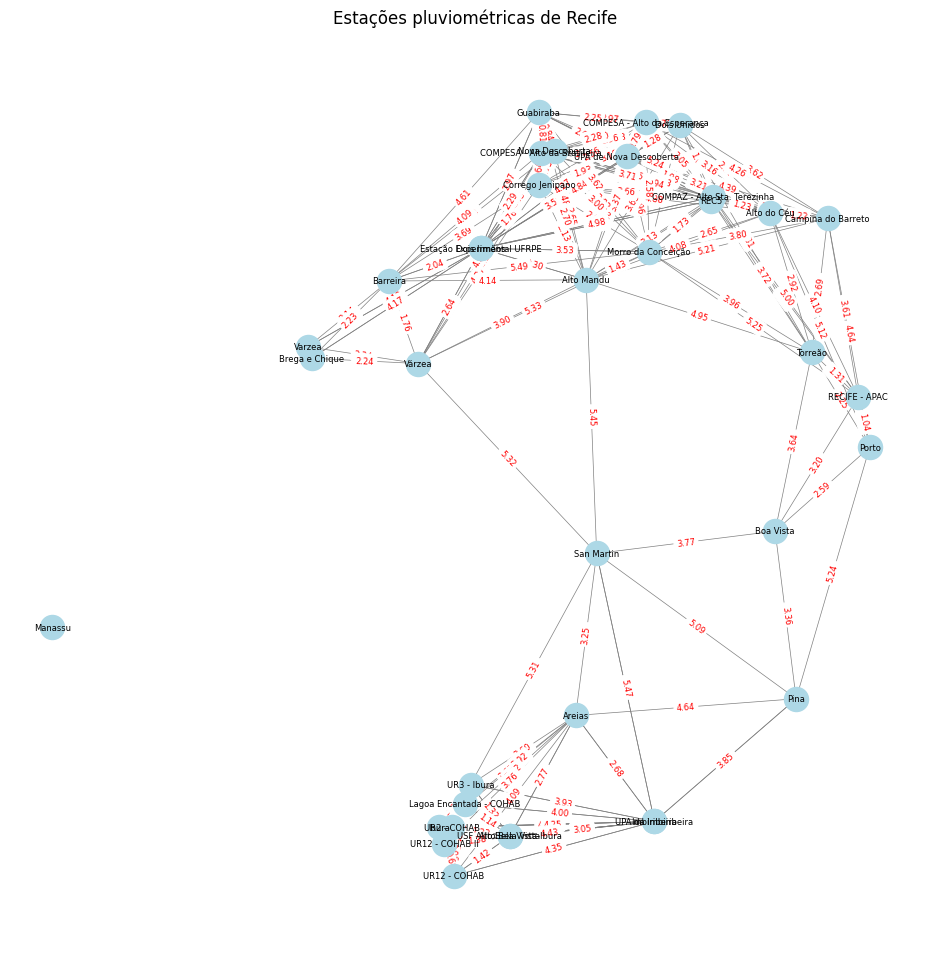

In [61]:

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(stations.keys())

# Adicionar arestas com base na distância
for i, (station1, coord1) in enumerate(stations.items()):
    for station2, coord2 in list(stations.items())[i+1:]:
        dist = haversine(coord1[0], coord1[1], coord2[0], coord2[1])
        if dist <= 5.5:  # 6 km como um exemplo de limite
            G.add_edge(station1, station2, weight=dist)

# Adicionar atributos aos nós
for node in G.nodes():
    G.nodes[node]['latitude'] = stations[node][0]
    G.nodes[node]['longitude'] = stations[node][1]
    G.nodes[node]['altitude'] = altitude[node]



# Plotar o grafo
pos = {station: (coord[1], coord[0]) for station, coord in stations.items()}
edge_labels =  dict([((u, v,), f"{data['weight']:.2f}") for u, v, data in G.edges(data=True)])
node_labels = {node: f"{node}\nLat: {G.nodes[node]['latitude']:.3f}\nLon: {G.nodes[node]['longitude']:.3f}\nAlt: {G.nodes[node]['altitude']:.2f}m" for node in G.nodes()}

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', width=0.5)
nx.draw_networkx_labels(G, pos, labels=None, font_size=6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

plt.title("Estações pluviométricas de Recife")
plt.show()


In [60]:
G.nodes['Manassu']

{'latitude': -8.08619, 'longitude': -35.028697, 'altitude': 90}

In [54]:
import json

nx.write_graphml(G, "grafo_estacoes.graphml")
nx.write_gml(G, "grafo_estacoes.gml")

graph_dict = nx.node_link_data(G)
with open("grafo_estacoes.json", "w") as f:
    json.dump(graph_dict, f)

In [55]:
G.edges(data=True)

EdgeDataView([('Estação Experimental UFRPE', 'UPA de Nova Descoberta', {'weight': 3.5646733086488336}), ('Estação Experimental UFRPE', 'Dois Unidos', {'weight': 4.84212527136019}), ('Estação Experimental UFRPE', 'Corrego Jenipapo', {'weight': 1.7559024957977771}), ('Estação Experimental UFRPE', 'Alto Mandu', {'weight': 2.29529741156482}), ('Estação Experimental UFRPE', 'Guabiraba', {'weight': 2.971618947978483}), ('Estação Experimental UFRPE', 'Morro da Conceição', {'weight': 3.530511182459939}), ('Estação Experimental UFRPE', 'Várzea', {'weight': 2.643298395191357}), ('Estação Experimental UFRPE', 'Varzea', {'weight': 4.122542174188022}), ('Estação Experimental UFRPE', 'Dois Irmãos', {'weight': 0.0}), ('Estação Experimental UFRPE', 'Nova Descoberta', {'weight': 2.480200931567576}), ('Estação Experimental UFRPE', 'Brega e Chique', {'weight': 4.1695169738870845}), ('Estação Experimental UFRPE', 'Barreira', {'weight': 2.0399276733506873}), ('Estação Experimental UFRPE', 'REC5', {'weight'